# Predicting_Car_Prices

In this project, I utilized the k-nearest neighbors algorithm to predict a car's market price using its attributes. The dataset contains information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more. You can read more about the data set [here](https://archive.ics.uci.edu/ml/datasets/automobile) and can download it directly from [here](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data). Here's a preview of the attributes:

#### Attribute Information:

1. `symboling`: -3, -2, -1, 0, 1, 2, 3.
2. `normalized-losses`: continuous from 65 to 256.
3. `make`:
alfa-romero, audi, bmw, chevrolet, dodge, honda,
isuzu, jaguar, mazda, mercedes-benz, mercury,
mitsubishi, nissan, peugot, plymouth, porsche,
renault, saab, subaru, toyota, volkswagen, volvo
4. `fuel-type`: diesel, gas.
5. `aspiration`: std, turbo.
6. `num-of-doors`: four, two.
7. `body-style: hardtop`, wagon, sedan, hatchback, convertible.
8. `drive-wheels`: 4wd, fwd, rwd.
9. `engine-location`: front, rear.
10. `wheel-base`: continuous from 86.6 120.9.
11. `length`: continuous from 141.1 to 208.1.
12. `width`: continuous from 60.3 to 72.3.
13. `height`: continuous from 47.8 to 59.8.
14. `curb-weight`: continuous from 1488 to 4066.
15. `engine-type`: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. `num-of-cylinders`: eight, five, four, six, three, twelve, two.
17. `engine-size`: continuous from 61 to 326.
18. `fuel-system`: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. `bore`: continuous from 2.54 to 3.94.
20. `stroke`: continuous from 2.07 to 4.17.
21. `compression-ratio`: continuous from 7 to 23.
22. `horsepower`: continuous from 48 to 288.
23. `peak-rpm`: continuous from 4150 to 6600.
24. `city-mpg`: continuous from 13 to 49.
25. `highway-mpg`: continuous from 16 to 54.
26. `price`: continuous from 5118 to 45400.

In [1]:
# importing libraries

import pandas as pd
import numpy as np

pd.options.display.max_columns = 99

In [2]:
# reading the dataset

cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm',
        'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data', names=cols)

In [3]:
cars.head(10)

symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   
5          2                 ?         audi       gas        std          two   
6          1               158         audi       gas        std         four   
7          1                 ?         audi       gas        std         four   
8          1               158         audi       gas      turbo         four   
9          0                 ?         audi       gas      turbo          two   

    body-style drive-wheels engine-location  wheel-base  length  width  \
0  convertible          rwd           front        88.6   168.8   64.1   
1  convertible          rwd           front        88.6   168.8   64.1   
2    hatchback          rwd           front        94.5   171.2   65.5   
3        sedan          fwd           front        99.8   176.6   66.2   
4        sedan          4wd           front        99.4   176.6   66.4   
5        sedan          fwd           front        99.8   177.3   66.3   
6        sedan          fwd           front       105.8   192.7   71.4   
7        wagon          fwd           front       105.8   192.7   71.4   
8        sedan          fwd           front       105.8   192.7   71.4   
9    hatchback          4wd           front        99.5   178.2   67.9   

   height  curb-weight engine-type num-of-cylinders  engine-size fuel-system  \
0    48.8         2548        dohc             four          130        mpfi   
1    48.8         2548        dohc             four          130        mpfi   
2    52.4         2823        ohcv              six          152        mpfi   
3    54.3         2337         ohc             four          109        mpfi   
4    54.3         2824         ohc             five          136        mpfi   
5    53.1         2507         ohc             five          136        mpfi   
6    55.7         2844         ohc             five          136        mpfi   
7    55.7         2954         ohc             five          136        mpfi   
8    55.9         3086         ohc             five          131        mpfi   
9    52.0         3053         ohc             five          131        mpfi   

   bore stroke  compression-rate horsepower peak-rpm  city-mpg  highway-mpg  \
0  3.47   2.68               9.0        111     5000        21           27   
1  3.47   2.68               9.0        111     5000        21           27   
2  2.68   3.47               9.0        154     5000        19           26   
3  3.19   3.40              10.0        102     5500        24           30   
4  3.19   3.40               8.0        115     5500        18           22   
5  3.19   3.40               8.5        110     5500        19           25   
6  3.19   3.40               8.5        110     5500        19           25   
7  3.19   3.40               8.5        110     5500        19           25   
8  3.13   3.40               8.3        140     5500        17           20   
9  3.13   3.40               7.0        160     5500        16           22   

   price  
0  13495  
1  16500  
2  16500  
3  13950  
4  17450  
5  15250  
6  17710  
7  18920  
8  23875  
9      ?

In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [5]:
# creating a new dataframe with columns having continuous values
# from https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.names

continuous_values_cols = ['normalized-losses', 'wheel-base',
                          'length', 'width', 'height','curb-weight',
                          'bore', 'stroke', 'compression-rate',
                          'horsepower', 'peak-rpm', 'city-mpg',
                          'highway-mpg', 'price']

cars_numeric = cars[continuous_values_cols]
cars_numeric.sample(10)

normalized-losses  wheel-base  length  width  height  curb-weight  bore  \
79                161        93.0   157.3   63.8    50.8         2145  3.03   
60                115        98.8   177.8   66.5    55.5         2410  3.39   
23                118        93.7   157.3   63.8    50.8         2128  3.03   
87                125        96.3   172.4   65.4    51.6         2403  3.17   
107               161       107.9   186.7   68.4    56.7         3020  3.46   
0                   ?        88.6   168.8   64.1    48.8         2548  3.47   
7                   ?       105.8   192.7   71.4    55.7         2954  3.19   
39                 85        96.5   175.4   65.2    54.1         2304  3.15   
130                 ?        96.1   181.5   66.5    55.2         2579  3.46   
141               102        97.2   172.0   65.4    52.5         2145  3.62   

    stroke  compression-rate horsepower peak-rpm  city-mpg  highway-mpg  price  
79    3.39               7.6        102     5500        24           30   7689  
60    3.39               8.6         84     4800        26           32   8495  
23    3.39               7.6        102     5500        24           30   7957  
87    3.46               7.5        116     5500        23           30   9279  
107   3.19               8.4         97     5000        19           24  11900  
0     2.68               9.0        111     5000        21           27  13495  
7     3.40               8.5        110     5500        19           25  18920  
39    3.58               9.0         86     5800        27           33   8845  
130   3.90               8.7          ?        ?        23           31   9295  
141   2.64               9.5         82     4800        32           37   7126

In [6]:
# cleaning the data

# replacing '?' symbols in the columns
cars_numeric = cars_numeric.replace('?', np.nan)
cars_numeric

normalized-losses  wheel-base  length  width  height  curb-weight  bore  \
0                 NaN        88.6   168.8   64.1    48.8         2548  3.47   
1                 NaN        88.6   168.8   64.1    48.8         2548  3.47   
2                 NaN        94.5   171.2   65.5    52.4         2823  2.68   
3                 164        99.8   176.6   66.2    54.3         2337  3.19   
4                 164        99.4   176.6   66.4    54.3         2824  3.19   
..                ...         ...     ...    ...     ...          ...   ...   
200                95       109.1   188.8   68.9    55.5         2952  3.78   
201                95       109.1   188.8   68.8    55.5         3049  3.78   
202                95       109.1   188.8   68.9    55.5         3012  3.58   
203                95       109.1   188.8   68.9    55.5         3217  3.01   
204                95       109.1   188.8   68.9    55.5         3062  3.78   

    stroke  compression-rate horsepower peak-rpm  city-mpg  highway-mpg  price  
0     2.68               9.0        111     5000        21           27  13495  
1     2.68               9.0        111     5000        21           27  16500  
2     3.47               9.0        154     5000        19           26  16500  
3     3.40              10.0        102     5500        24           30  13950  
4     3.40               8.0        115     5500        18           22  17450  
..     ...               ...        ...      ...       ...          ...    ...  
200   3.15               9.5        114     5400        23           28  16845  
201   3.15               8.7        160     5300        19           25  19045  
202   2.87               8.8        134     5500        18           23  21485  
203   3.40              23.0        106     4800        26           27  22470  
204   3.15               9.5        114     5400        19           25  22625  

[205 rows x 14 columns]

In [7]:
# converting all columns to float dtype
cars_numeric = cars_numeric.astype('float')

# null values count
cars_numeric.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [8]:
# removing null values in the price column as 'price' is the column we want to predict
cars_numeric = cars_numeric.dropna(subset=['price'])
cars_numeric.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [9]:
# replacing missing values in other columns with column means.
cars_numeric = cars_numeric.fillna(cars_numeric.mean())

# confirming that there's no more missing values!
cars_numeric.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [10]:
# normalizing all columnns to range from 0 to 1 except the target column.
price_col = cars_numeric['price']
cars_numeric = ((cars_numeric - cars_numeric.min()) /
                (cars_numeric.max() - cars_numeric.min())
               )
cars_numeric['price'] = price_col

In [11]:
# creating a univariate(single column/variable) model

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col, target_col, df):
    knn = KNeighborsRegressor()
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    # Fit a KNN model using default k value.
    knn.fit(train_df[[train_col]], train_df[target_col])
    
    # Make predictions using model.
    predicted_labels = knn.predict(test_df[[train_col]])

    # Calculate and return RMSE.
    mse = mean_squared_error(test_df[target_col], predicted_labels)
    rmse = np.sqrt(mse)
    return rmse

rmse_results = {}
train_cols = cars_numeric.columns.drop('price')

# For each column (minus `price`), train a model, return RMSE value
# and add to the dictionary `rmse_results`.
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', cars_numeric)
    rmse_results[col] = rmse_val

# Create a Series object from the dictionary so 
# we can easily view the results, sort, etc
rmse_results_series = pd.Series(rmse_results)
rmse_results_series.sort_values()

horsepower           4037.037713
curb-weight          4401.118255
highway-mpg          4630.026799
width                4704.482590
city-mpg             4766.422505
length               5427.200961
wheel-base           5461.553998
compression-rate     6610.812153
bore                 6780.627785
normalized-losses    7330.197653
peak-rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64

In [12]:
# modifying the function to include a parameter for the 'k' value

def knn_train_test(train_col, target_col, df):
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [1,3,5,7,9]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[[train_col]], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[[train_col]])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

# For each column (minus `price`), train a model, return RMSE value
# and add to the dictionary `rmse_results`.
train_cols = cars_numeric.columns.drop('price')
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', cars_numeric)
    k_rmse_results[col] = rmse_val

k_rmse_results

{'normalized-losses': {1: 7846.750605148984,
  3: 7500.5698123109905,
  5: 7330.197653434445,
  7: 7756.421586234123,
  9: 7688.096096891432},
 'wheel-base': {1: 4493.734068810494,
  3: 5120.161506064513,
  5: 5461.553997873057,
  7: 5448.1070513823315,
  9: 5738.405685192312},
 'length': {1: 4628.45550121557,
  3: 5129.8358210721635,
  5: 5427.2009608367125,
  7: 5313.427720847974,
  9: 5383.054514833446},
 'width': {1: 4559.257297950061,
  3: 4606.413692169901,
  5: 4704.482589704386,
  7: 4571.485046194653,
  9: 4652.914172067787},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8144.441042663747,
  7: 7679.598124393773,
  9: 7811.03606291223},
 'curb-weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4401.118254793124,
  7: 4330.608104418053,
  9: 4632.044474454401},
 'bore': {1: 8602.58848450066,
  3: 6984.239489480916,
  5: 6780.627784685976,
  7: 6878.097965921532,
  9: 6866.808502038413},
 'stroke': {1: 9116.495955406906,
  3: 7338.68466990294,
  5: 8006

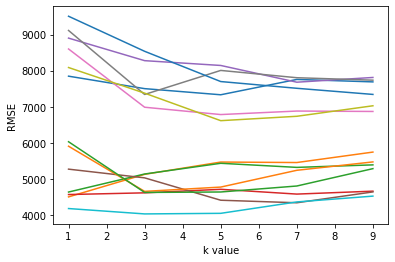

In [13]:
# importing library for plotting

import matplotlib.pyplot as plt
%matplotlib inline

for key,value in k_rmse_results.items():
    x = list(value.keys())
    y = list(value.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

In [14]:
# computing average RMSE across different `k` values for each feature.

feature_avg_rmse = {}
for key, val in k_rmse_results.items():
    avg_rmse = np.mean(list(val.values()))
    feature_avg_rmse[key] = avg_rmse
    
avg_rmse_series = pd.Series(feature_avg_rmse)
avg_rmse_series.sort_values()

horsepower           4219.377860
width                4618.910560
curb-weight          4730.075815
highway-mpg          5069.469256
length               5176.394904
city-mpg             5202.409003
wheel-base           5252.392462
compression-rate     7166.073599
bore                 7222.472445
normalized-losses    7624.407151
stroke               8000.240467
peak-rpm             8119.365233
height               8163.346266
dtype: float64

In [15]:
# creating a multivariate(multiple columns/variables) model

def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [5]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[train_cols])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

two_best_features = list(avg_rmse_series.sort_values().keys()[:2])
rmse_val = knn_train_test(two_best_features, 'price', cars_numeric)
k_rmse_results['two best features'] = rmse_val

three_best_features = list(avg_rmse_series.sort_values().keys()[:3])
rmse_val = knn_train_test(three_best_features, 'price', cars_numeric)
k_rmse_results['three best features'] = rmse_val

four_best_features = list(avg_rmse_series.sort_values().keys()[:4])
rmse_val = knn_train_test(four_best_features, 'price', cars_numeric)
k_rmse_results['four best features'] = rmse_val

five_best_features = list(avg_rmse_series.sort_values().keys()[:5])
rmse_val = knn_train_test(five_best_features, 'price', cars_numeric)
k_rmse_results['five best features'] = rmse_val

k_rmse_results

{'two best features': {5: 3589.3132622073304},
 'three best features': {5: 3305.9401397969677},
 'four best features': {5: 3358.6915801682458},
 'five best features': {5: 3665.546673045813}}

In [16]:
# optimizing the model that performed the best in the previous step

def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [i for i in range(1, 25)]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[train_cols])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

two_best_features = list(avg_rmse_series.sort_values().keys()[:2])
rmse_val = knn_train_test(two_best_features, 'price', cars_numeric)
k_rmse_results["two best features"] = rmse_val

three_best_features = list(avg_rmse_series.sort_values().keys()[:3])
rmse_val = knn_train_test(three_best_features, 'price', cars_numeric)
k_rmse_results["three best features"] = rmse_val

four_best_features = list(avg_rmse_series.sort_values().keys()[:4])
rmse_val = knn_train_test(four_best_features, 'price', cars_numeric)
k_rmse_results["four best features"] = rmse_val

five_best_features = list(avg_rmse_series.sort_values().keys()[:5])
rmse_val = knn_train_test(five_best_features, 'price', cars_numeric)
k_rmse_results["five best features"] = rmse_val

k_rmse_results

{'two best features': {1: 4061.9613050304106,
  2: 3497.49936199118,
  3: 3402.8692636542114,
  4: 3587.0044198356923,
  5: 3589.3132622073304,
  6: 3680.062981095498,
  7: 3756.92796407086,
  8: 3937.770418264052,
  9: 4078.3485919700097,
  10: 4163.828373808731,
  11: 4297.135962941241,
  12: 4370.753019740529,
  13: 4500.462028689254,
  14: 4604.156707686779,
  15: 4595.345097101211,
  16: 4605.433669910023,
  17: 4611.2845838376215,
  18: 4598.88218482117,
  19: 4579.964891966457,
  20: 4653.966845712387,
  21: 4759.076059393234,
  22: 4807.805949321809,
  23: 4865.320887129985,
  24: 4910.715769042787},
 'three best features': {1: 3013.0109985241875,
  2: 2813.285969825997,
  3: 3171.585284478674,
  4: 3182.3137417981943,
  5: 3305.9401397969677,
  6: 3522.506848900376,
  7: 3774.3772094554106,
  8: 3978.969124021116,
  9: 3992.923680588881,
  10: 4076.2381473803043,
  11: 4156.388331131807,
  12: 4201.10713385948,
  13: 4303.62676861325,
  14: 4359.693296989702,
  15: 4371.771103

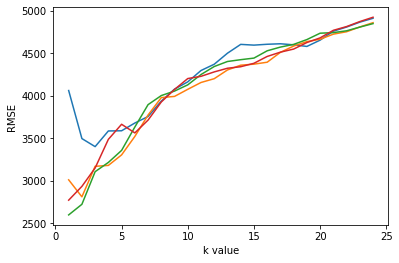

In [17]:
# plotting the results

for key,val in k_rmse_results.items():
    x = list(val.keys())
    y = list(val.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

In [18]:
# extracting optimal k value for each model

import operator

two_feat_k_value = {}
three_feat_k_value = {}
four_feat_k_value = {}
five_feat_k_value = {}

dict_ = k_rmse_results.copy()

for k, v in dict_.items():
    for key,val in v.items():
        if k == 'two best features':
            two_feat_k_value[key] = val
        elif k == 'three best features':
            three_feat_k_value[key] = val
        elif k == 'four best features':
            four_feat_k_value[key] = val
        else:
            five_feat_k_value[key] = val
            
print('two best features: {}'.format(min(two_feat_k_value.items(), key=operator.itemgetter(1))[1]))
print('three best features: {}'.format(min(three_feat_k_value.items(), key=operator.itemgetter(1))[1]))
print('four best features: {}'.format(min(four_feat_k_value.items(), key=operator.itemgetter(1))[1]))
print('five best features: {}'.format(min(five_feat_k_value.items(), key=operator.itemgetter(1))[1]))

two best features: 3402.8692636542114
three best features: 2813.285969825997
four best features: 2600.746383728188
five best features: 2773.8991269216394
